# I. Création du JSON à partir du C3D

In [1]:
import pandas as pd
from main import PreProcessing, Statistics   

file_path = "C:/Users/antho/Documents/MEMOIRE_M2/CODE_STAGE_M2/DATA_FOG/LE_LIEVRE_Emmanuel_1971_03_19_LEEM1971/2023-05-26/2023-05-26_overlay_detectFOG/Video overlay 16 update.c3d"
# Définir les informations du patient
patient_id = 1234
date_de_naissance = "1963-06-23"
medicaments = "Traitement X"
# Instancier l'objet DetectFog
detector = PreProcessing(file_path)
detector.creation_json_grace_c3d(patient_id, date_de_naissance, medicaments)
detector.extract_data_interval()
detector.normalize_data() 
detector.decoupage_en_fenetres()
detector.label_fenetre()
data = detector.association_label_fenetre_data()
#print(dictionnaire_global["metadata"]["temps"])

# Instanciation de l'objet Statistics en passant l'objet PreProcessing en argument
data_final = Statistics(data)

In [2]:
# Appel de la méthode stats() de la classe Statistics
data_stat, stats_fog = data_final.stats()


Temps total de l'enregistrement : 42.48266346410461 secondes
Nombre de FOG : 2
Pourcentage total de FOG sur la totalité de l'enregistrement : 7.86%


# ____________________________________________________________________________________

In [6]:
import pandas as pd
from main import PreProcessing
# Définir le chemin du fichier C3D
file_path = "C:/Users/antho/Documents/MEMOIRE_M2/CODE_STAGE_M2/DATA_FOG/LE_LIEVRE_Emmanuel_1971_03_19_LEEM1971/2023-05-26/2023-05-26_overlay_detectFOG/Video overlay 16 update.c3d"
# Créer une instance de la classe FOGDetector en utilisant le chemin du fichier C3D
detector = PreProcessing(file_path)

# Définir les informations du patient
patient_id = 1234
date_de_naissance = "1963-06-23"
medicaments = "Traitement X"

# Définir le chemin de sortie du fichier JSON
#output_path = "C:/Users/antho/Documents/MEMOIRE_M2/CODE_STAGE_M2/DATABASE/Video overlay class.json"
#output_path = "C:/Users/antho/Documents/MEMOIRE_M2/CODE_STAGE_M2/DATABASE/Video overlay Video overlay classtest_1650.json"
# Appeler la méthode de création JSON en utilisant les informations du patient et le chemin de sortie
detector.creation_json_grace_c3d(patient_id, date_de_naissance, medicaments)#, output_path)


# II. Visualisation graphique du signal non borné

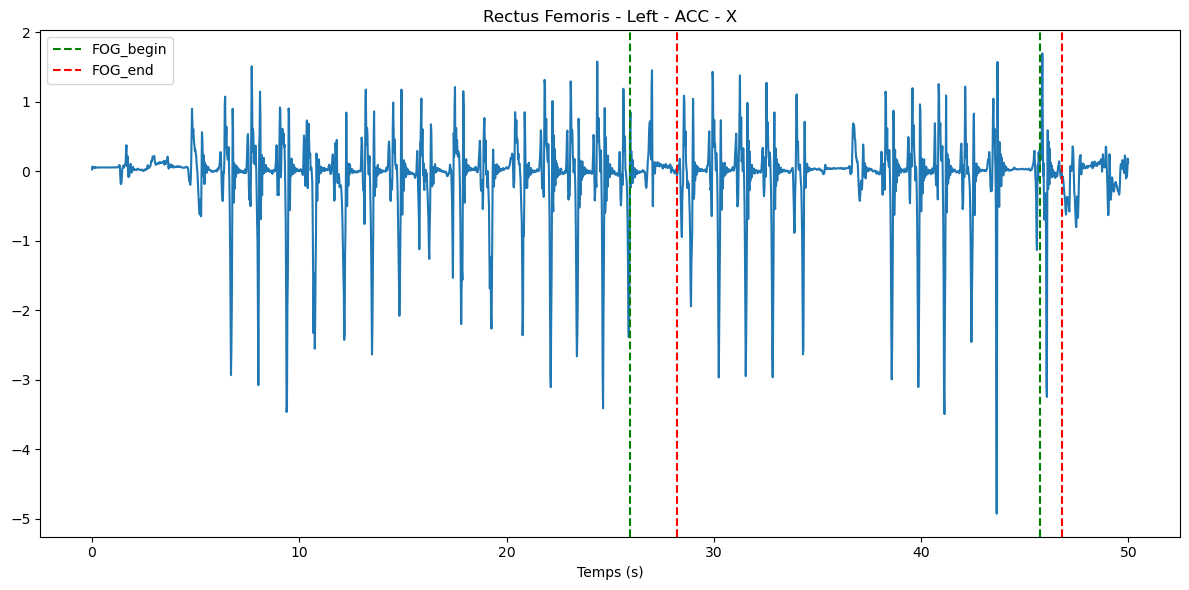

In [4]:
detector.plot_data_FOG("Rectus Femoris", "Left", "ACC", "X")

# III. Visualisation graphique du signal borné entre début debout et fin debout

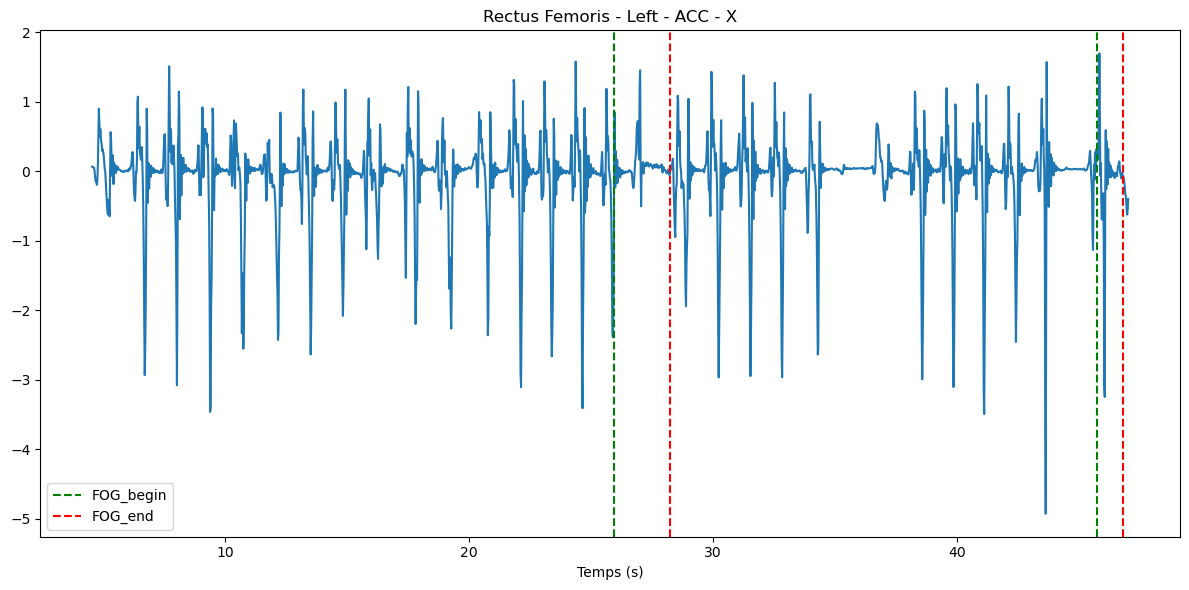

In [6]:
detector.extract_data_interval()
detector.plot_data_FOG_start_end("Rectus Femoris", "Left", "ACC", "X")

# IV. Normalisation des données par rapport à l'étendue

In [7]:
detector.normalize_data() 

# V. Fenêtrage

## 1. Découpage en fenêtre de 2sec avec chevauchement à 80%

In [8]:
detector.decoupage_en_fenetres()
# Obtenir le dictionnaire global après la découpe en fenêtres
dictionnaire_global = detector.fenetres_data
print(dictionnaire_global["FOG"])


{'debut': [25.953332901000977, 45.72666549682617], 'fin': [28.226667404174805, 46.7933349609375]}


In [9]:
# On peut accéder à toutes les données des fenêtres à ce moment là, car les étiquettes FOG ne sont pas encore associées
data = detector.fenetres_data["Rectus Femoris"]["Left"]["ACC"]["X"][0:2]
test = detector.fenetres_data["Rectus Femoris"]["Left"]["ACC"]["X"]

## 2. Association des fenêtres avec les évènements de nonFog,transitionPreFog,preFog,transitionFog, fog, transitionNonFog

In [10]:
detector.label_fenetre()
detector.association_label_fenetre_data()

In [11]:
dictionnaire_global = detector.mix_label_fenetre_data

#on sélectionne une fenêtre particulière
a=dictionnaire_global["Rectus Femoris"]["Left"]["ACC"]["X"]["fog"].loc[[54]]
temps = dictionnaire_global['metadata']["temps"].loc[[54]]
rf_fog = dictionnaire_global["Rectus Femoris"]["Left"]["ACC"]["X"]["fog"]
rf_nofog = dictionnaire_global["Rectus Femoris"]["Left"]["ACC"]["X"]["noFog"]

b = pd.concat([rf_fog, rf_nofog])